In [2]:
%plot native
close all; clear all; clc;

%计算IIR滤波器系数
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## 冲激不变法

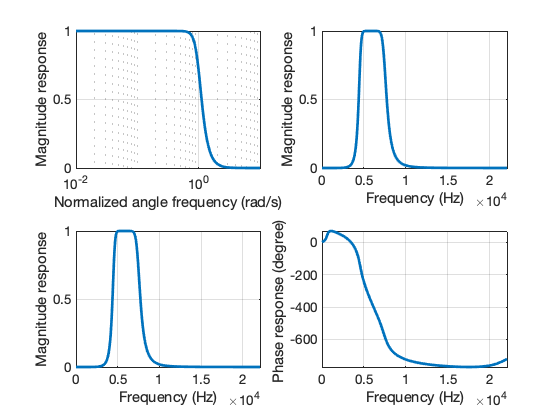

In [1]:
fs = 44100;%采样频率
Ts = 1/fs;%采样间隔

fpe = 4500; %模拟低通通带上限频率
fse = 7500; %模拟低通阻带下限频率
wpe = 2*fpe/fs; %模拟低通通带上限归一化角频率
wse = 2*fse/fs; %模拟低通阻带下限归一化角频率
Ap = 1; %通带波动
As = 15; %阻带衰减

%巴特沃斯模拟低通原型滤波器设计
[N,wn]=buttord(wpe,wse,Ap ,As,'s');
[z,p,k]=buttap(N); %模拟低通原型零、极点系数
[b1,a1]=zp2tf(z,p,k); %零、极点系数转换为传递函数

%巴特沃斯模拟低通原型滤波器频率响应
f1 = 0:0.01:10-0.01;
[H1,w1]=freqs(b1,a1,f1);
magH1=abs(H1);

figure;%模拟低通原型滤波器幅频特性曲线
subplot(2,2,1);semilogx(w1,magH1,'Linewidth',2);grid;
xlabel('Normalized angle frequency (rad/s)'); ylabel('Magnitude response');

fw = fse-fpe; %模拟带通滤波器带宽
bw = 2*pi*fw; %模拟带通滤波器带宽角频率
omegac = 2*pi*sqrt(fse*fpe);

% 由模拟低通原型变换为模拟带通滤波器
[b2,a2]=lp2bp(b1,a1,omegac,bw); %模拟带通滤波函数系数

%巴特沃斯模拟带通滤波器频率响应
f2 = [0:1:fs/2]*2*pi;
[H2,w2]= freqs(b2,a2,f2);
magH2 =abs(H2);

%模拟带通滤波器幅频特性曲线
subplot(2,2,2);plot(w2/2/pi,magH2,'Linewidth',2);grid;
xlabel('Frequency (Hz)'); ylabel('Magnitude response');

% 冲激不变法进行离散化设计
[bz,az] = impinvar(b2,a2,fs); %数字带通滤波函数系数

%巴特沃斯型数字带通滤波器频率响应
[H,f] =  freqz(bz,az,44100,fs);
magH = abs(H);
phaH = 180*unwrap(angle(H))/pi;

subplot(2,2,3);plot(f,magH,'Linewidth',2); grid;%数字带通滤波器幅频特性曲线
xlabel('Frequency (Hz)'); ylabel('Magnitude response');
subplot(2,2,4);plot(f,phaH,'Linewidth',2); grid;%数字带通滤波器相频特性曲线
xlabel('Frequency (Hz)'); ylabel('Phase response (degree) ');

## 双线性变换法

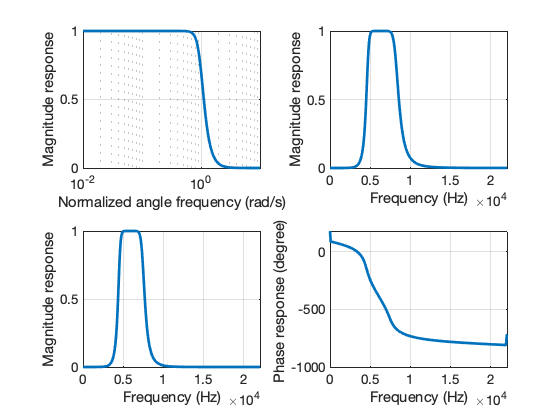

In [2]:
fs = 44100;%采样频率
Ts = 1/fs;%采样间隔

fpe = 4500; %模拟低通通带上限频率
fse = 7500; %模拟低通阻带下限频率
wpe = 2*fpe/fs; %模拟低通通带上限归一化角频率
wse = 2*fse/fs; %模拟低通阻带下限归一化角频率
Ap = 1; %通带波动
As = 15; %阻带衰减

%巴特沃斯模拟低通原型滤波器设计
[N,wn]=buttord(wpe,wse,Ap ,As,'s');
[z,p,k]=buttap(N); %模拟低通原型零、极点系数
[b1,a1]=zp2tf(z,p,k); %零、极点系数转换为传递函数

%巴特沃斯模拟低通原型滤波器频率响应
f1 = 0:0.01:10-0.01;
[H1,w1]=freqs(b1,a1,f1);
magH1=abs(H1);

figure;%模拟低通原型滤波器幅频特性曲线
subplot(2,2,1);semilogx(w1,magH1,'Linewidth',2);grid;
xlabel('Normalized angle frequency (rad/s)'); ylabel('Magnitude response');

%预畸变处理
wape = 2/Ts*tan(Ts/2*2*pi*fpe);%带通滤波器通带下限频率
wase = 2/Ts*tan(Ts/2*2*pi*fse);%带通滤波器通带上限频率
bw = wase-wape;%预畸变处理之后的带宽
omegac = sqrt(wape*wase);

% 由模拟低通原型变换为模拟带通滤波器
[b2,a2]=lp2bp(b1,a1,omegac,bw); %模拟带通滤波函数系数

%巴特沃斯模拟带通滤波器频率响应
f2 = [0:1:fs/2]*2*pi;
[H2,w2]= freqs(b2,a2,f2);
magH2 =abs(H2);

%模拟带通滤波器幅频特性曲线
subplot(2,2,2);plot(w2/2/pi,magH2,'Linewidth',2);grid;
xlabel('Frequency (Hz)'); ylabel('Magnitude response');

% 双线性变换法进行离散化设计
[bz,az] = bilinear(b2,a2,fs); %数字带通滤波函数系数

%巴特沃斯型数字带通滤波器频率响应
[H,f] =  freqz(bz,az,44100,fs);
magH = abs(H);
phaH = 180*unwrap(angle(H))/pi;

subplot(2,2,3);plot(f,magH,'Linewidth',2); grid;%数字带通滤波器幅频特性曲线
xlabel('Frequency (Hz)'); ylabel('Magnitude response');
subplot(2,2,4);plot(f,phaH,'Linewidth',2); grid;%数字带通滤波器相频特性曲线
xlabel('Frequency (Hz)'); ylabel('Phase response (degree) ');

#### 二者比较

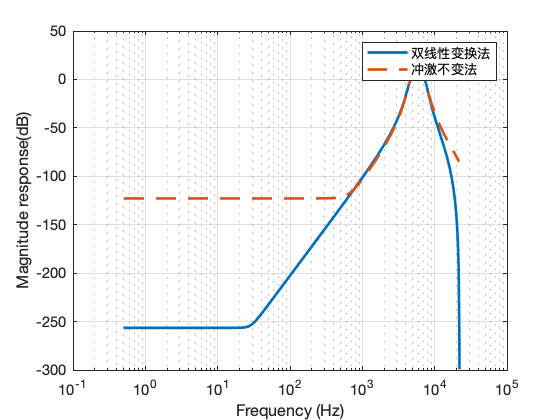

In [3]:
% 冲激不变法计算滤波器系数
fw = fse-fpe; %模拟带通滤波器带宽
bw = 2*pi*fw; %模拟带通滤波器带宽角频率
omegac = 2*pi*sqrt(fse*fpe);
[b2inv,a2inv]=lp2bp(b1,a1,omegac,bw); %模拟带通滤波函数系数
[bzinv,azinv] = impinvar(b2inv,a2inv,fs); %数字带通滤波函数系数
[Hinv,f] =  freqz(bzinv,azinv,44100,fs);
magHinv = abs(Hinv);
phaHinv = 180*unwrap(angle(Hinv))/pi;

figure;%绘图，比较两种方法的幅度响应
semilogx(f,20*log10(magH),'-','Linewidth',2);
grid;hold on;
semilogx(f,20*log10(magHinv),'--','Linewidth',2);
hold off;legend('双线性变换法','冲激不变法');
xlabel('Frequency (Hz)'); ylabel('Magnitude response(dB)');